In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('titanic.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


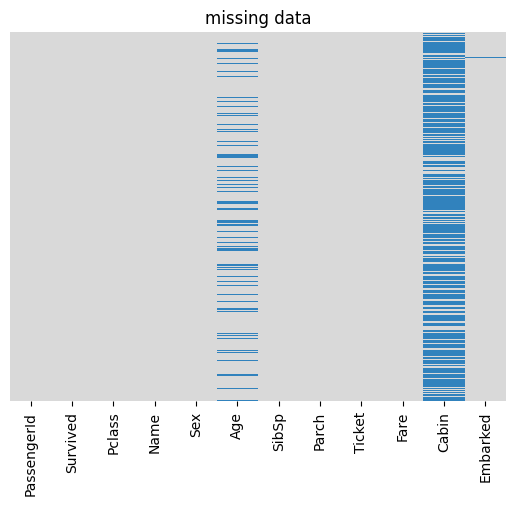

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False, cbar=False , cmap= 'tab20c_r')
plt.title('missing data')
plt.show()

<ipython-input-50-51ac5c041062>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x= 'Pclass' , y='Age', data=df, palette='GnBu_d').set_title('age by passing')


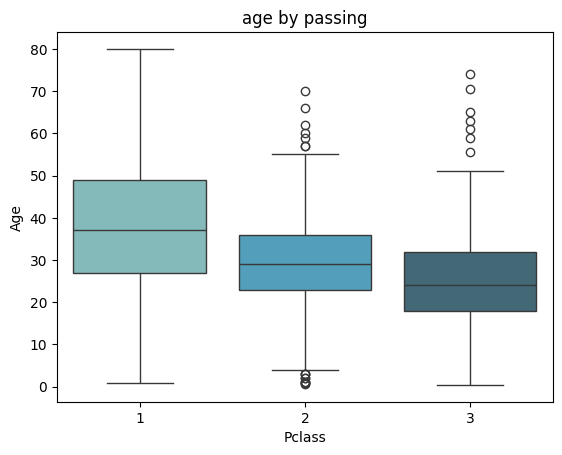

In [ ]:
sns.boxplot(x= 'Pclass' , y='Age', data=df, palette='GnBu_d').set_title('age by passing')
plt.show()

In [ ]:
from typing import AsyncGenerator
def imute_age(cols):
  Age=cols
  Pclass = cols[1]
  if pd.isnull(Age):
    if Pclass == 1:
      return 37
    elif Pclass == 2:
        return 29

    else:

       return 24



  else:
       return Age


#apply the function Age columns
  df['Age']= df[['Age', 'Pclass']  ].apply(impute_age ,axis=1)

In [ ]:
df.drop('Cabin', axis = 1 , inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
df.drop('PassengerId', axis = 1 , inplace=True)

In [ ]:
df.dropna(inplace = True)

In [ ]:
# removeunnecessary columns
df.drop(['Name','Ticket'],axis=1, inplace=True)

#convert object
object =['Sex','Embarked']


for column in object:
   df[column] = df[column].astype('category')




In [ ]:
#identify categorical feature
df.select_dtypes(['category']).columns


Index(['Sex', 'Embarked'], dtype='object')

In [ ]:
#convert categorical veriable into dummy
sex= pd.get_dummies(df['Sex'], drop_first=True)

embarked= pd.get_dummies(df['Embarked'], drop_first= True)


In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
# add new dummy columns df
df=pd.concat([df, sex, embarked], axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,male,22.0,1,0,7.2500,S,True,False,True
1,1,1,female,38.0,1,0,71.2833,C,False,False,False
2,1,3,female,26.0,0,0,7.9250,S,False,False,True
3,1,1,female,35.0,1,0,53.1000,S,False,False,True
4,0,3,male,35.0,0,0,8.0500,S,True,False,True


In [ ]:
#drop columns
df.drop(['Sex', 'Embarked'],axis=1 , inplace=True )
 #shape to trian data
print('train data', df.shape)


train data (712, 9)


**Objective: Machine Learning**

**Target variable**

In [ ]:
x= df.drop('Survived', axis=1)
y= df['Survived']


In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test, y_train , y_test =train_test_split(x,y, test_size=.20, random_state=101)


In [ ]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


**1** **logistic regresiion**

In [ ]:
#fit
#import model
from sklearn.linear_model import LogisticRegression

#create instance of model
lreg = LogisticRegression()

# pass train data into model
lreg.fit(x_train , y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
#predict
y_pred_lreg = lreg.predict(x_test)
print(y_pred_lreg)

[0 0 1 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1
 0 1 1 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 1 0 1 1 0 0 1 1 0 1 1
 1 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 1 0 1 0 1]


**Model Evaluation**

In [ ]:
#score  IT
from sklearn.metrics import  classification_report, accuracy_score

print('classification model')
#accuracy
logreg_accuracy = round(accuracy_score(y_test, y_pred_lreg) *100,2)
print('accuracy',logreg_accuracy)

classification model
accuracy 81.12


2** **Decision Tree**

**Model Train**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree =DecisionTreeClassifier()
dtree.fit(x_train,y_train)


DecisionTreeClassifier()

**Model Evaluation**

In [ ]:
from sklearn.metrics import accuracy_score
y_pred=dtree.predict(x_test)
print('Decision tree classifier')
#accuracy
dtree_acuuracy=round(accuracy_score(y_test,y_pred)*100,2)

print('accuray',dtree_acuuracy,'%')

Decision tree classifier
accuray 74.13 %


**3 Random forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)


RandomForestClassifier()

**Model Evaluation**


**Random forest**

In [ ]:
from sklearn.metrics import accuracy_score
y_pred=rfc.predict(x_test)
print('Random forest classifier')
#accuracy
accuracy_score=round(accuracy_score(y_test,y_pred)*100,2)
print('Accurcy',accuracy_score)


Random forest classifier
Accurcy 75.52


**4 Gradient boosting classifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)


GradientBoostingClassifier()

**model Evaluation**

**gradient boost**

In [ ]:
from sklearn.metrics import accuracy_score
y_pred=gbc.predict(x_test)
print('gradient boosting classifier')
#accuracy
accuracy_score=round(accuracy_score(y_test,y_pred)*100,2)
print('accuracy',accuracy_score)

gradient boosting classifier
accuracy 81.12


In [ ]:
#sample socre model
model_scores={
    'LogisticRegression':81.12,
    'Decision tree classifier':74.13 ,
    'Random forest classifier': 75.52,
    'gradient boosting classifier':81.12

}
sorted_scores=sorted(model_scores.items(),key=lambda x:x[1], reverse=True)
print('Model ranking greater to better:')
for rank,(model_name,score) in enumerate(sorted_scores,start=1):
  print(f'{rank},{model_name}:{score}')


Model ranking greater to better:
1,LogisticRegression:81.12
2,gradient boosting classifier:81.12
3,Random forest classifier:75.52
4,Decision tree classifier:74.13
